<a href="https://colab.research.google.com/github/rakshita-vijay/pytorch/blob/main/pt_006_simple_nn_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [24]:
num_feat = len("Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline".split(","))

class Model(nn.Module):
  def __init__(self, in_features=num_feat, h1=8, h2=9, h3=10, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.fc3 = nn.Linear(h2, h3)
    self.out = nn.Linear(h3, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.out(x)

    return x

In [25]:
urlll = 'https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
my_data = pd.read_csv(urlll)

In [26]:
x = my_data.drop('Wine', axis=1)
y = my_data['Wine']

In [27]:
x = x.values
y = y.values
x, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train) - 1  # Subtract 1 to make labels 0-indexed
y_test = torch.LongTensor(y_test) - 1    # Subtract 1 to make labels 0-indexed

In [29]:
torch.manual_seed(42)
model = Model()

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [31]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epochs')

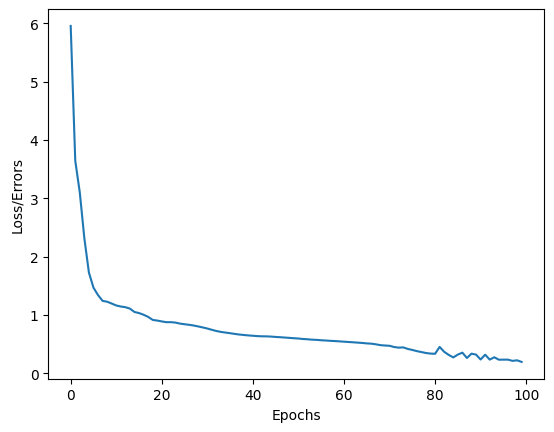

In [32]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Errors')
plt.xlabel('Epochs')

In [33]:
crct = 0
wrng = 0

with torch.no_grad():
  for i, data in enumerate(x_test):
    y_eval = model.forward(data)
    loss = criterion(y_eval, y_test[i])
    if y_eval.argmax().item() == y_test[i]:
      crct += 1
    else:
      wrng += 1

    print(f'{i+1}. {y_eval.argmax().item()} -> {y_test[i]}')

print(crct, "correct")
print(wrng, "wrong")

1. 0 -> 0
2. 0 -> 0
3. 2 -> 2
4. 0 -> 0
5. 1 -> 1
6. 0 -> 0
7. 1 -> 1
8. 2 -> 2
9. 1 -> 1
10. 2 -> 2
11. 0 -> 0
12. 2 -> 2
13. 0 -> 0
14. 2 -> 1
15. 0 -> 0
16. 1 -> 1
17. 1 -> 1
18. 1 -> 1
19. 0 -> 0
20. 1 -> 1
21. 0 -> 0
22. 1 -> 1
23. 2 -> 1
24. 2 -> 2
25. 2 -> 2
26. 2 -> 2
27. 1 -> 1
28. 1 -> 1
29. 1 -> 1
30. 0 -> 0
31. 0 -> 0
32. 1 -> 1
33. 2 -> 2
34. 0 -> 0
35. 0 -> 0
36. 0 -> 0
34 correct
2 wrong
